In [19]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
#without baseline
df_train = pd.read_csv("used training data.csv")
df_test = pd.read_csv("used testing data.csv")

In [21]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

In [22]:
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

In [23]:
lr = LinearRegression().fit(X_train,y_train)

In [24]:
print ("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.32
Test score: 0.18


In [25]:
#PCA & Linear Regression

In [26]:
n_components = []
training_score = []
testing_score = []
for i in range(2,73):
    n_components.append(i)
    pca = PCA(n_components=i)
    pca.fit(X_train)
    transform_X_train = pca.transform(X_train)
    pca.fit(X_test)
    transform_X_test = pca.transform(X_test)
    lr_pca = LinearRegression().fit(transform_X_train,y_train)
    tr_score = lr_pca.score(transform_X_train, y_train)
    ts_score = lr_pca.score(transform_X_test,y_test)
    training_score.append(tr_score)
    testing_score.append(ts_score)
n_components = np.array(n_components)
training_score = np.array(training_score)
testing_score = np.array(testing_score)

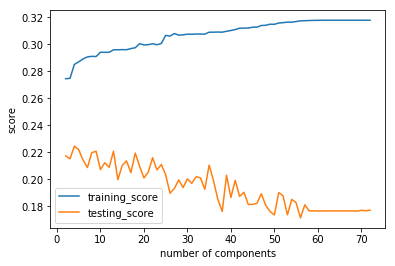

In [27]:
plt.plot(n_components, training_score, label ='training_score')
plt.plot(n_components, testing_score, label ='testing_score')
plt.xlabel('number of components')
plt.ylabel('score')
plt.legend()